In [ ]:
!pip install scikit-plot

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 3.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML baylor/survey lung cancer.csv")
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:
#Duplicate Checking

print(f'Total Duplicated Rows : {df.duplicated().sum()}')

Total Duplicated Rows : 33


In [ ]:
#Changing Value for Gender Column Male : 1, Female : 0

df['GENDER'] = df['GENDER'].replace({'M' : 1, 'F' : 0})
df['GENDER'].value_counts()

1    162
0    147
Name: GENDER, dtype: int64

In [ ]:
df['PATIENT_ID'] = np.arange(1, df.shape[0] + 1)

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,PATIENT_ID
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,3
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,4
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,305
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,306
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,307
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,308


In [ ]:
smoking = df[(df['SMOKING'] == 2)]
no_smoking = df[(df['SMOKING'] == 1)]

alcohol = df[(df['ALCOHOL CONSUMING'] == 2)]
no_alcohol = df[(df['ALCOHOL CONSUMING'] == 1)]

cancer = df[(df['LUNG_CANCER'] == 'YES')]
no_cancer = df[(df['LUNG_CANCER'] == 'NO')]

In [ ]:
set_smoking = set(smoking['PATIENT_ID'])
set_nosmoking = set(no_smoking['PATIENT_ID'])

set_alcohol = set(alcohol['PATIENT_ID'])
set_noalcohol = set(no_alcohol['PATIENT_ID'])

set_cancer = set(cancer['PATIENT_ID'])
set_nocancer = set(no_cancer['PATIENT_ID'])

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib_venn import venn3, venn2
import seaborn as sns

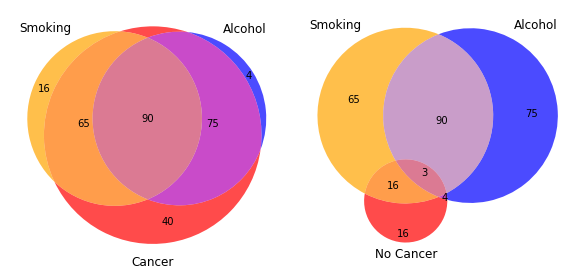

In [ ]:
plt.figure(figsize=(8,8), constrained_layout = True)

plt.subplot(2,2,1)
venn3([set_smoking, set_alcohol, set_cancer], ('Smoking', 'Alcohol', 'Cancer'),
     set_colors=("orange", "blue", "red"), alpha=0.7)

plt.subplot(2,2,2)
venn3([set_smoking, set_alcohol, set_nocancer], ('Smoking', 'Alcohol', 'No Cancer'),
     set_colors=("orange", "blue", "red"), alpha=0.7)

It is significantly more likely to get lung cancer if one BOTH smokes and consumes alcohol (3 vs 76)
It is significantly more likely to get lung cancer if one EITHER smokes OR consumes alcohol (16 vs 55 and 4 vs 69)
There is a substantial possibility that one may still get lung cancer without smoking or consuming alcohol (38 cases).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
cause_symptom = ['SMOKING', 'ALCOHOL CONSUMING',
                 'SHORTNESS OF BREATH', 'FATIGUE ', 'COUGHING', 'WHEEZING',
                 'CHEST PAIN', 'ALLERGY ', 'YELLOW_FINGERS', 'CHRONIC DISEASE',
                 'LUNG_CANCER',]
df_cause_symptom = df[cause_symptom].copy()
df_cause_symptom.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE,LUNG_CANCER
0,1,2,2,2,2,2,2,1,2,1,YES
1,2,1,2,2,1,1,2,2,1,2,YES
2,1,1,2,2,2,2,2,1,1,1,NO
3,2,2,1,1,1,1,2,1,2,1,NO
4,1,1,2,1,2,2,1,1,2,1,NO


In [ ]:
print ('Total Cancer positive Patients : {} '.format(df_cause_symptom['LUNG_CANCER'].value_counts()['YES']))
print ('Total Cancer negative Patients : {} '.format(df_cause_symptom['LUNG_CANCER'].value_counts()['NO']))

Total Cancer positive Patients : 270 
Total Cancer negative Patients : 39 


In [ ]:
key_rev = {'YES' : 2, 'NO' : 1}

df_cause_symptom = df_cause_symptom.replace(key_rev)
df_cause_symptom.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE,LUNG_CANCER
0,1,2,2,2,2,2,2,1,2,1,2
1,2,1,2,2,1,1,2,2,1,2,2
2,1,1,2,2,2,2,2,1,1,1,1
3,2,2,1,1,1,1,2,1,2,1,1
4,1,1,2,1,2,2,1,1,2,1,1


In [ ]:
X = df_cause_symptom.drop('LUNG_CANCER', axis = 1)
X.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE
0,1,2,2,2,2,2,2,1,2,1
1,2,1,2,2,1,1,2,2,1,2
2,1,1,2,2,2,2,2,1,1,1
3,2,2,1,1,1,1,2,1,2,1
4,1,1,2,1,2,2,1,1,2,1


In [ ]:
y = df_cause_symptom['LUNG_CANCER']
y.head(5)

0    2
1    2
2    1
3    1
4    1
Name: LUNG_CANCER, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 SMOKING                1
ALCOHOL CONSUMING      1
SHORTNESS OF BREATH    1
FATIGUE                1
COUGHING               1
WHEEZING               1
CHEST PAIN             1
ALLERGY                1
YELLOW_FINGERS         1
CHRONIC DISEASE        1
dtype: int64
per-feature maximum before scaling:
 SMOKING                2
ALCOHOL CONSUMING      2
SHORTNESS OF BREATH    2
FATIGUE                2
COUGHING               2
WHEEZING               2
CHEST PAIN             2
ALLERGY                2
YELLOW_FINGERS         2
CHRONIC DISEASE        2
dtype: int64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


without using scalling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.86


with min-max scaling

In [ ]:
#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.86


with standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_s = scaler.transform(X_train)
X_test_scaled_s = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled_s, y_train)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled_s, y_test)))

KNN test accuracy: 0.85


using dimention reduction with scaling

In [ ]:
X_new = pd.DataFrame(X_train_scaled, columns=X.columns)

In [ ]:
from sklearn.decomposition import PCA
skpca = PCA(n_components=2)
X_pca = skpca.fit_transform(X_new)

In [ ]:
# learning an SVM on the scaled training data
knn.fit(X_pca, y_train)

X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

KNN test accuracy: 0.81


using dimention reduction without scaling

In [ ]:
X_new_1 = pd.DataFrame(X_train, columns=X.columns)
X_pca_1 = skpca.fit_transform(X_new_1)

# learning an SVM on the scaled training data
knn.fit(X_pca_1, y_train)

X_test_new_1 = pd.DataFrame(X_test, columns=X.columns)
X_test_pca_1 = skpca.transform(X_test_new_1)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_pca_1, y_test)))

KNN test accuracy: 0.81


Using Algorithm

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import scikitplot as skplt

In [ ]:
# Logistic regression
from sklearn.metrics import classification_report,  accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           1       0.20      0.40      0.27         5
           2       0.96      0.89      0.92        73

    accuracy                           0.86        78
   macro avg       0.58      0.65      0.59        78
weighted avg       0.91      0.86      0.88        78

0.8589743589743589


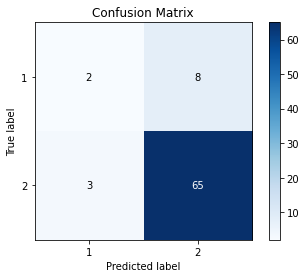

In [ ]:
y_pred1 = model1.predict(X_test)
print(classification_report(y_pred1, y_test))
print(accuracy_score(y_test,y_pred1))
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)
plt.show()

In [ ]:
print("Intercept :",model1.intercept_)
print('Slope :',model1.coef_)

Intercept : [-13.16588099]
Slope : [[0.2988197  1.82533912 0.15816963 1.3165967  0.95187919 0.94260186
  0.84715046 1.26841923 1.99993288 0.79203642]]


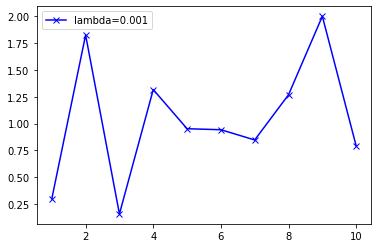

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10]
y1 = [0.2988197, 1.82533912, 0.15816963, 1.3165967,  0.95187919, 0.94260186,0.84715046, 1.26841923, 1.99993288, 0.79203642]
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()

'SMOKING', 'ALCOHOL CONSUMING',
                 'SHORTNESS OF BREATH', 'FATIGUE ', 'COUGHING', 'WHEEZING',
                 'CHEST PAIN', 'ALLERGY ', 'YELLOW_FINGERS', 'CHRONIC DISEASE'

Normal

No handles with labels found to put in legend.


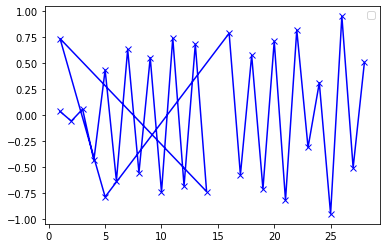

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,1,5,16,17,18,19,20,21,22,23,24,25,26,27,28,]
y1 = [ 0.03493867, -0.0576498,   0.05752762, -0.43476156,  0.43463938, -0.63228964,
   0.63216747, -0.55287439,  0.55275221, -0.74105141,  0.74092924, -0.68216256,
   0.68204038, -0.73593646,  0.73581428, -0.78709682,  0.78697464, -0.57482337,
   0.57470119, -0.71088443 , 0.71076225, -0.81856078,  0.81843861, -0.31106819,
   0.31094602,-0.95109455 , 0.95097237, -0.50691857,  0.50679639]
plt.plot(x, y1,color='blue', marker='x', )
plt.legend(loc="best")
plt.show()